# 4. 모델 훈련

## 4.1 선형 회귀
선형 모델은 아래 식처럼 입력 특성의 가중치 합와 편향<small>bias</small>이라는 상수를 이용해 만든다.

$$ \widehat{y}=\theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n $$

- $y$는 예측값이다.
- $n$은 특성의 수이다.
- $x_i$는 $i$번째 특성의 값이다.
- $\theta_i$는 $i$번째 모델 파라미터이다. 편향 $\theta_0$과 특성의 가중치 $\theta_1, \theta_2, \cdots, \theta_n$이 있다.

이를 간단히 아래처럼 만들 수 있다.

$$ \widehat{y} = h_\theta(X) = \theta \cdot X $$

모델을 훈련시킨다는 것은 모델이 훈련 세트에 맞도록 파라미터를 변경한다는 것이다.
이를 위해서는 모델이 훈련 데이터에 얼마나 잘 맞는지 평가해야 한다.
성능 측정 지표 중 하나인 평균 제곱 오차(MSE)는 다음과 같다.

$$ \mathrm{MSE}(X, h_\theta)=\frac{1}{m} \sum_{i=1}^{m} (\theta^T\mathrm{x}^{(i)}-y^{(i)})^2 $$

### 4.1.1 정규방정식
비용 함수를 최소화할 수 있는 $\theta$값을 바로 찾을 수 있는 수식이 있다. 이를 **정규방정식**이라고 한다.

$$ \widehat{\theta} = (X^TX)^{-1}X^Ty $$

- $\widehat{\theta}$는 비용 함수를 최소화하는 $\theta$값이다.
- $y$는 $y^{(1)}$부터 $y^{(m)}$까지를 포함하는 벡터이다.

이 공식을 테스트해 보자.

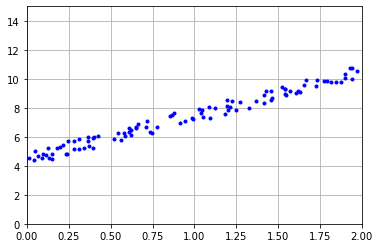

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# 그래프 그리기
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51359766],
       [2.98323418]])

모델의 예측을 그래프로 나타내 보자.

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

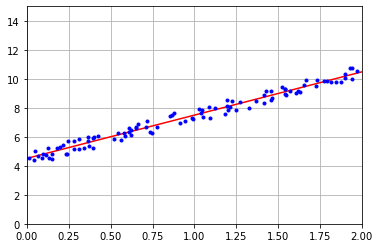

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

반면 사이킷런에서 선형 회귀를 수행하는 것은 간단하다.

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

### 4.1.2 계산 복잡도
정규방정식은 크기가 $ (n+1) \times (n+1) $인 $ X^TX $의 역행렬을 계산한다.
이를 계산하는 복잡도는 일반적으로 $ O(n^{2.4}) $에서 $ O(n^3) $사이이다.

사이킷런의 `LinearRegression` 클래스가 사용하는 방법은 약 $ O(n^2) $의 복잡도를 가진다.

선형 회귀 모델은 예측이 매우 빠르다. 예측 계산의 복잡도는 샘플 수와 특성 수에 선형적이다.

## 4.2 경사 하강법

### 4.2.1 배치 경사 하강법
경사 하강법을 구현하려면 $\theta_j$가 조금 바뀌었을때 비용 함수가 얼마나 바뀌는지를 계산해야 한다.
이를 **편도함수**라고 한다. 아래 식은 파라미터 $\theta_j$에 대한 비용 함수의 편도함수이다.

$$ \frac{\partial}{\partial \theta_j}\mathrm{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^m (\theta^T\mathrm{x}^{(i)}-y^{(i)})x_j^{(i)} $$

편도함수를 각각 계산하는 대신 아래 식을 사용하면 한꺼번에 계산할 수 있다.

$$\nabla_\theta\mathrm{MSE}(\theta) = \begin{pmatrix} \frac{\partial}{\partial \theta_0}\mathrm{MSE}(\theta) \\ \frac{\partial}{\partial \theta_1}\mathrm{MSE}(\theta) \\ \vdots \\ \frac{\partial}{\partial \theta_n}\mathrm{MSE}(\theta) \end{pmatrix} = \frac{2}{m}X^T(X\theta - y) $$

위로 향하는 그레디언트 벡터가 구해지면 반대 방향으로 내려가야 한다. 여기서 학습률 $\eta$가 사용된다.

$$ \theta^{(\text{next step})}=\theta-\eta\nabla_\theta\mathrm{MSE}(\theta) $$

In [7]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100
theta_path_bgd = []

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

theta

array([[4.51359766],
       [2.98323418]])

만약 학습률이 너무 작거나 크다면 어떻게 될까?

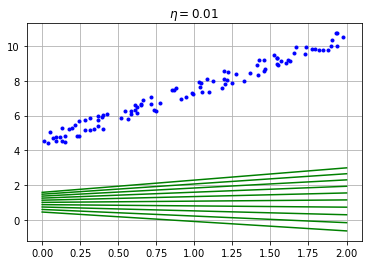

In [8]:
plt.plot(X, y, "b.")
plt.grid(True)
plt.title(r"$\eta = 0.01$")

eta = 0.01  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration < 10:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "g-")

학습률이 너무 낮은 경우에는 최저점에 도달은 하겠지만 시간이 너무 오래 걸릴 것이다.

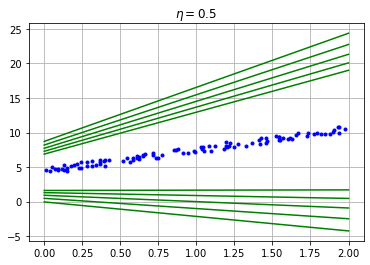

In [9]:
plt.plot(X, y, "b.")
plt.grid(True)
plt.title(r"$\eta = 0.5$")

eta = 0.5  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration < 10:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "g-")

학습률이 너무 높은 경우에는 최저점을 찾지 못하고 발산하게 될 것이다.

### 4.2.2 확률적 경사 하강법
배치 경사 하강법의 문제는 매 스텝에서 전체 훈련 세트를 이용해 그래디언트를 계산한다는 것이다.
훈련 세트가 커지면 매우 느려지게 된다.

이와는 반대로 **확률적 경사 하강법**은 매 스텝에서 한 개의 샘플을 무작위로 선택하고
그 하나의 샘플에 대한 그라디언트를 계산한다. 적은 수의 샘플을 다루기 때문에 배치 경사 하강법보다 빠르다.

반면 무작위이므로 배치 경사 하강법에 비해 불안정하게 된다. 비용 함수가 최솟값에 다가갈 동안
부드럽게 감소하지 않고 무작위로 요동치게 된다. 알고리즘이 멈출 때의 값이 최적치인지 확신할 수 없다.

무작위성은 지역 최솟값에서 탈출할 수 있게 해 주지만 전역 최솟값에 도달하지 못하게 한다는 점에서 좋지 않다.
이를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다.

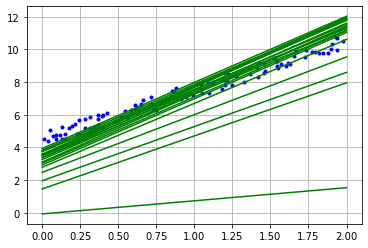

확률적 경사 하강법의 첫 20스텝


In [10]:
plt.grid(True)
plt.plot(X, y, "b.")

def learning_schedule(t):
    t0, t1 = 5, 50
    return t0 / (t + t1)

n_epochs = 50
theta = np.random.randn(2, 1)
m = len(X_b)
theta_path_sgd = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "g-")

plt.show()
print("확률적 경사 하강법의 첫 20스텝")

In [11]:
theta

array([[4.5170222 ],
       [2.98424055]])

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 `SGDRegressor`클래스를 사용한다.
아래 코드는 최대 1000 epoch, 또는 한 epoch에서 0.001보다 손실이 적게 줄어들 때까지 실행됩니다. 학습률은 0.1입니다.

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.4928448]), array([2.99219226]))

### 4.2.3 미니배치 경사 하강법
**미니배치 경사 하강법**은 미니배치라 부르는 임의의 샘플 세트에 대해 그레디언트를 계산한다.
미니배치의 크기를 크게 할수록 SGD보다 덜 불규칙적으로 움직인다.

In [13]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
t = 0
theta = np.random.randn(2, 1)

def learning_schedule(t):
    t0, t1 = 200, 1000
    return t0 / (t + t1)

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.55697515],
       [3.02703615]])

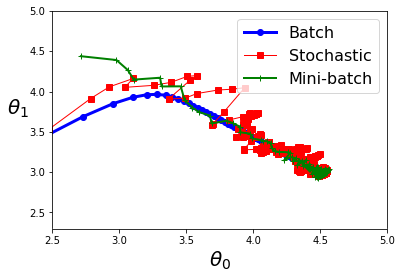

경사 하강법의 경로


In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")

plt.legend(loc="upper right", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 5.0, 2.3, 5.0])
plt.show()
print("경사 하강법의 경로")

## 4.3 다항 회귀
